In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

inflows = pd.read_parquet('Data/ucsd-inflows.pqt')
outflows = pd.read_parquet('Data/ucsd-outflows.pqt')

unique_inflow_consumers = inflows['prism_consumer_id'].unique()
unique_outflow_consumers = outflows['prism_consumer_id'].unique()
train_inflow_consumers, test_inflow_consumers = train_test_split(unique_inflow_consumers, test_size=0.2, random_state=1)
train_outflow_consumers, test_outflow_consumers = train_test_split(unique_outflow_consumers, test_size=0.2, random_state=1)

intrain = inflows[inflows['prism_consumer_id'].isin(train_inflow_consumers)]
intest = inflows[inflows['prism_consumer_id'].isin(test_inflow_consumers)]

outtrain = outflows[outflows['prism_consumer_id'].isin(train_outflow_consumers)]
outtest = outflows[outflows['prism_consumer_id'].isin(test_outflow_consumers)]

In the above code, the program randomly splits 20% of the users as testing data and 80% as training data. We also assign a random_state so that whenever we run the program we end up analysing the same set of randomized data.

The task is to test for bias in the split. The first test would be to check if categories of inflows/outflows are evenly ditributed between the two sets of data. Below we take the we have a table of percentages to see if the categories are similarly split between the datasets and as we can see it is, there is a very minimal difference as to what catagories were assigned to training and test data.

In [2]:
percent_category_intrain = intrain['category'].value_counts(normalize=True) * 100
percent_category_intest = intest['category'].value_counts(normalize=True) * 100

incategory_df = pd.DataFrame({
    'Inflow Train': percent_category_intrain,
    'Inflow Test': percent_category_intest,
})

incategory_df.fillna(0, inplace=True)
incategory_df


,Inflow Train,Inflow Test
category,,
EXTERNAL_TRANSFER,30.741977,29.538985
SELF_TRANSFER,20.906066,24.055975
DEPOSIT,11.837893,12.438044
MISCELLANEOUS,10.873132,10.730139
PAYCHECK,6.530859,6.159803
PAYCHECK_PLACEHOLDER,5.055969,5.199355
REFUND,4.778488,3.485479
INVESTMENT_INCOME,3.509346,2.830583
SMALL_DOLLAR_ADVANCE,2.631828,2.747975


In [3]:
percent_category_outtrain = outtrain['category'].value_counts(normalize=True) * 100
percent_category_outtest = outtest['category'].value_counts(normalize=True) * 100

outcategory_df = pd.DataFrame({
    'Outflow Train': percent_category_outtrain,
    'Outflow Test': percent_category_outtest,
})

outcategory_df.fillna(0, inplace=True)
outcategory_df

,Outflow Train,Outflow Test
category,,
ACCOUNT_FEES,1.450387,1.419093
ATM_CASH,4.588192,4.294417
AUTOMOTIVE,8.055723,7.927296
AUTO_LOAN,0.000048,0.000000
BILLS_UTILITIES,0.000529,0.002309
BNPL,0.066705,0.030210
CHILD_DEPENDENTS,0.039946,0.020396
CREDIT_CARD_PAYMENT,2.901929,2.926700
EDUCATION,0.174464,0.168175


Below we test to see if there are differences in the amount categories, and besides count and max statistic we do not see a differences. Before even analyzing the data, we knew the counts would be different as 80% is in training and 20% is in test, and we are not concerned with statistics such as max and min as they are only about 1 transaction. We also did K-S testing to see if there is a differences in distribution and with a p-value scores we have, we are confident that there is no difference. 

Amount Summary Statistics:
Inflow Train Set:
 count    4.126410e+05
mean     7.273829e+02
std      5.288169e+03
min      1.000000e-02
25%      2.001000e+01
50%      1.000000e+02
75%      5.000000e+02
max      1.154966e+06
Name: amount, dtype: float64
Inflow Test Set:
 count    100474.000000
mean        764.749907
std        5330.838302
min           0.010000
25%          22.000000
50%         100.000000
75%         500.000000
max      654853.210000
Name: amount, dtype: float64


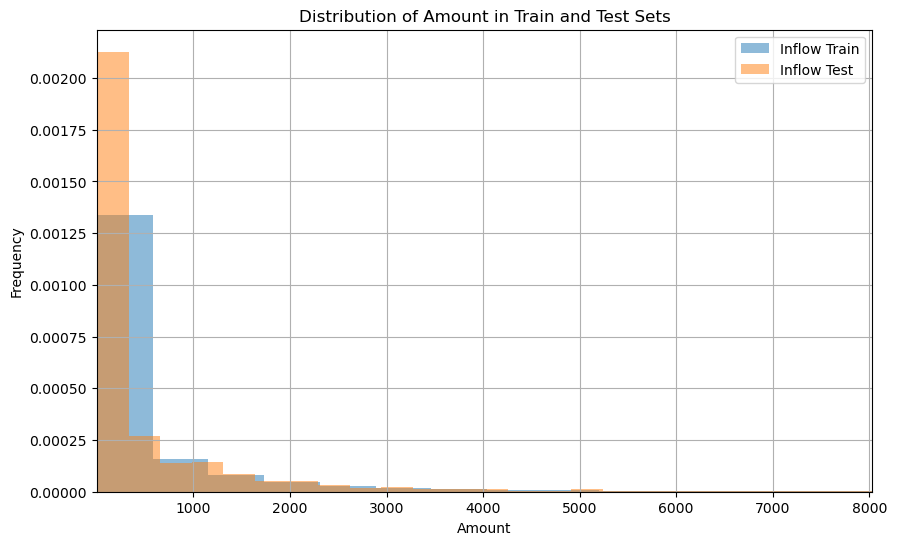

In [4]:
intrain_amount_summary = intrain['amount'].describe()
intest_amount_summary = intest['amount'].describe()

print("Amount Summary Statistics:")
print("Inflow Train Set:\n", intrain_amount_summary)
print("Inflow Test Set:\n", intest_amount_summary)


#ks_inflow_train_test = ks_2samp(intrain['amount'], intest['amount'])

#print(f"Inflow K-S test for 'amount':")
#print(f"Inflow Train vs Inflow Test: p-value = {ks_inflow_train_test.pvalue}")

plt.figure(figsize=(10, 6))

xlim_lower = intrain['amount'].quantile(0.01)
xlim_upper = intrain['amount'].quantile(0.99)
intrain['amount'].hist(label='Inflow Train', bins=2000, alpha=0.5, density=True)
plt.xlim(xlim_lower, xlim_upper)


intest['amount'].hist(label='Inflow Test', bins=2000, alpha=0.5, density=True)
plt.xlim(xlim_lower, xlim_upper)

plt.title('Distribution of Amount in Train and Test Sets')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()


In [5]:
outtrain_amount_summary = outtrain['amount'].describe()
outtest_amount_summary = outtest['amount'].describe()

print("Amount Summary Statistics:")
print("Outflow Train Set:\n", outtrain_amount_summary)
print("Outflow Test Set:\n", outtest_amount_summary)


#ks_outflow_train_test = ks_2samp(outtrain['amount'], outtest['amount'])

#print(f"K-S test for 'amount':")
#print(f"  Train vs Test: p-value = {ks_outflow_train_test.pvalue}")

Amount Summary Statistics:
Outflow Train Set:
 count    2.077790e+06
mean     1.456348e+02
std      1.645497e+03
min      0.000000e+00
25%      9.680000e+00
50%      2.450000e+01
75%      6.723000e+01
max      4.808249e+05
Name: amount, dtype: float64
Outflow Test Set:
 count    519698.000000
mean        143.093660
std        1892.857765
min           0.000000
25%           9.440000
50%          23.560000
75%          63.970000
max      654853.210000
Name: amount, dtype: float64


Here there are two histograms showing the distribution of posted dates, and we can see that the training and test data are almost identical in distribution. These graphs were drawn to ensure that the dates were not heavily skewed in either dataset but rather they were relativly equal

/tmp/ipykernel_680/2979337553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intrain['posted_date'] = pd.to_datetime(intrain['posted_date'])
/tmp/ipykernel_680/2979337553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intest['posted_date'] = pd.to_datetime(intest['posted_date'])


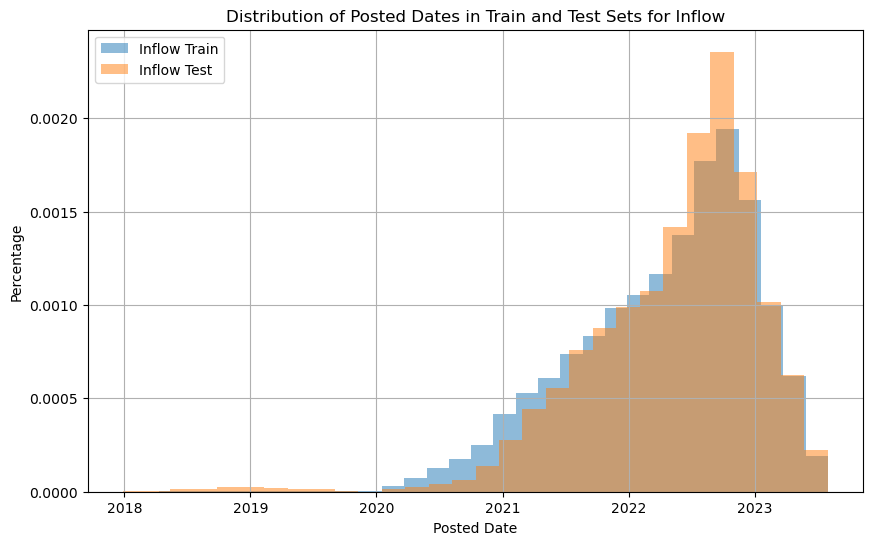

In [6]:
intrain['posted_date'] = pd.to_datetime(intrain['posted_date'])
intest['posted_date'] = pd.to_datetime(intest['posted_date'])

plt.figure(figsize=(10, 6))
intrain['posted_date'].hist(label='Inflow Train', bins=30, alpha=0.5, density=True)
intest['posted_date'].hist(label='Inflow Test', bins=30, alpha=0.5, density=True)

plt.title("Distribution of Posted Dates in Train and Test Sets for Inflow")
plt.xlabel("Posted Date")
plt.ylabel("Percentage")
plt.legend()
plt.show()

/tmp/ipykernel_680/1201179636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outtrain['posted_date'] = pd.to_datetime(outtrain['posted_date'])
/tmp/ipykernel_680/1201179636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outtest['posted_date'] = pd.to_datetime(outtest['posted_date'])


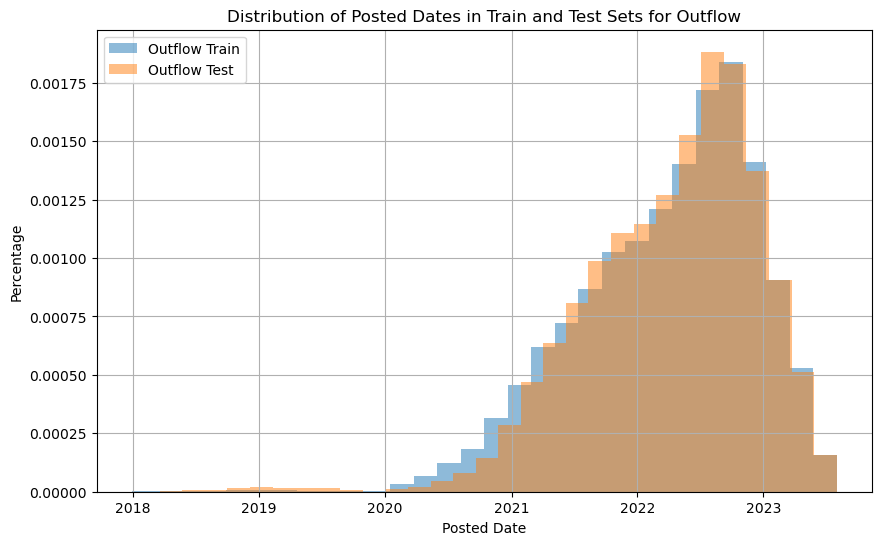

In [7]:
outtrain['posted_date'] = pd.to_datetime(outtrain['posted_date'])
outtest['posted_date'] = pd.to_datetime(outtest['posted_date'])

plt.figure(figsize=(10, 6))
outtrain['posted_date'].hist(label='Outflow Train', bins=30, alpha=0.5, density=True)
outtest['posted_date'].hist(label='Outflow Test', bins=30, alpha=0.5, density=True)

plt.title("Distribution of Posted Dates in Train and Test Sets for Outflow")
plt.xlabel("Posted Date")
plt.ylabel("Percentage")
plt.legend()
plt.show()

The code above split the dataset into train and testing and also proved that the distribution was even, so now any model developed can be used on these two datasets without problem.

In [8]:
outflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,LOAN,900.60,2022-07-05,LOAN
1,0,acc_0,ATM_CASH,80.00,2022-03-25,ATM_CASH
2,0,acc_0,TST* Casa Del Rio - Exp Fairlawn OH 09/24,18.42,2022-09-26,FOOD_AND_BEVERAGES
3,0,acc_0,LOAN,634.00,2023-01-10,LOAN
4,0,acc_0,Buffalo Wild Wings,26.47,2022-09-12,FOOD_AND_BEVERAGES
...,...,...,...,...,...,...
2597483,5941,acc_9524,ATM_CASH,8.42,2023-01-25,ATM_CASH
2597484,5941,acc_9524,ATM_CASH,2.06,2023-01-25,ATM_CASH
2597485,5941,acc_9524,ATM_CASH,262.88,2023-01-25,ATM_CASH
2597486,5941,acc_9524,ATM_CASH,10.00,2023-01-25,ATM_CASH


In [9]:
#Our Already existing code about cleaning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
inflows = pd.read_parquet("Data/ucsd-inflows.pqt")
outflows = pd.read_parquet("Data/ucsd-outflows.pqt")
import re

def clean_text(data):
    df = data.copy()

    # create the patterns

    # pattern1 handles the dates, and the states 
    pattern1 = r'\b(?:CA\s+)?(?:0?[1-9]|1[0-2])[/-](?:0?[1-9]|[12]\d|3[01])(?:/\d{2,4})?\b'

    # pattern2 handles unnecessary X's
    pattern2 = r'(?<!#)X+|#X+'

    # Handles unnecessary punctuation
    pattern3 = r"[^a-zA-Z0-9\s./]"

    # get rid of the state at the end of the wording
    pattern4 = r'\s[A-Z]{2}$'

    # Handles "POS WITHDRAWAL | DEBIT CARD WITHDRAWL"
    pattern5 = r'(pos withdrawal|debit card withdrawal)'

    # handles the word "purchase"
    pattern6 = r'(purchase)'

    # make everything lower case, and get rid of unnecessary spacing between words
    df['memo'] = df['memo'].apply(lambda x: re.sub(pattern3, '', re.sub(pattern2, '', re.sub(pattern1, '', x))))
    df['memo'] = df['memo'].apply(lambda x: " ".join(x.split()).strip())
    df['memo'] = df['memo'].apply(lambda x: re.sub(pattern4, '', x))
    df["memo"] = df["memo"].apply(lambda x: re.sub(pattern6, '', re.sub(pattern5, '', x.lower())))
    return df
cleaned_inflows = clean_text(inflows)
cleaned_outflows = clean_text(outflows)

In [10]:
#New Code to Add Memo's
w_cleaned_inflows = cleaned_inflows.copy()  
w_cleaned_outflows = cleaned_outflows.copy()

def add_text(memo, added_tokens):
    memo += ''.join(added_tokens)
    return memo

def whole_dollar_amount(amount):
    if amount % 1 == 0:
        return ' <W_D>'
    return ''

def day(date):
    return f" <D_{date.day}>"

def month(date):
    return f" <M_{date.month}>"

w_cleaned_inflows['memo'] = w_cleaned_inflows.apply(
    lambda row: add_text(row['memo'], 
                         [whole_dollar_amount(row['amount']), 
                          day(row['posted_date']),
                         month(row['posted_date'])]), axis=1
)

w_cleaned_inflows


,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,paycheck <D_18> <M_3>,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,eternaltransfer <W_D> <D_25> <M_10>,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,miscellaneous <D_26> <M_8>,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,eternaltransfer <W_D> <D_3> <M_6>,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,eternaltransfer <W_D> <D_29> <M_7>,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,eternaltransfer <D_21> <M_1>,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,eternaltransfer <D_23> <M_1>,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,eternaltransfer <W_D> <D_24> <M_1>,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,eternaltransfer <D_24> <M_1>,207.16,2023-01-24,EXTERNAL_TRANSFER


In [11]:
#w_cleaned_inflows = w_cleaned_inflows.drop(['prism_account_id', 'posted_date', 'memo'], axis=1)
w_cleaned_inflows.groupby(['prism_consumer_id', 'category']).describe()

amount                                     \
                                     count         mean          std      min   
prism_consumer_id category                                                      
0                 DEPOSIT              3.0  1125.060000  1028.980017   524.48   
                  EXTERNAL_TRANSFER   42.0  1002.156667  5690.861879     6.00   
                  INVESTMENT_INCOME   12.0     0.043333     0.004924     0.04   
                  MISCELLANEOUS        3.0   844.323333  1433.894298     6.29   
                  PAYCHECK            25.0  2401.826000   288.399539  1093.54   
...                                    ...          ...          ...      ...   
5941              EXTERNAL_TRANSFER  261.0   180.491034   137.620847     1.00   
                  INVESTMENT_INCOME    1.0  1239.510000          NaN  1239.51   
                  LOAN                 1.0   323.000000          NaN   323.00   
                  REFUND               2.0   295.765000     5.989194   291.53   
                  SELF_TRANSFER       30.0   307.167000   323.503346     0.01   

                                                                               
                                           25%       50%        75%       max  
prism_consumer_id category                                                     
0                 DEPOSIT             530.9900   537.500  1425.3500   2313.20  
                  EXTERNAL_TRANSFER    75.0000   100.000   100.0000  37000.00  
                  INVESTMENT_INCOME     0.0400     0.040     0.0500      0.05  
                  MISCELLANEOUS        16.4850    26.680  1263.3400   2500.00  
                  PAYCHECK           2331.7100  2526.190  2528.4000   2547.35  
...                                        ...       ...        ...       ...  
5941              EXTERNAL_TRANSFER    62.8900   160.480   267.1300    716.45  
                  INVESTMENT_INCOME  1239.5100  1239.510  1239.5100   1239.51  
                  LOAN                323.0000   323.000   323.0000    323.00  
                  REFUND              293.6475   295.765   297.8825    300.00  
                  SELF_TRANSFER        81.2500   200.000   400.0000   1300.00  

[19160 rows x 8 columns]

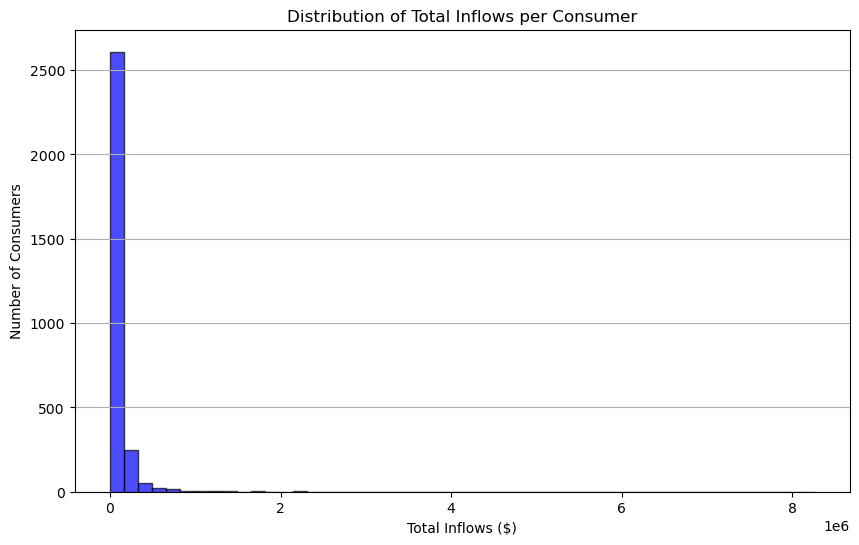

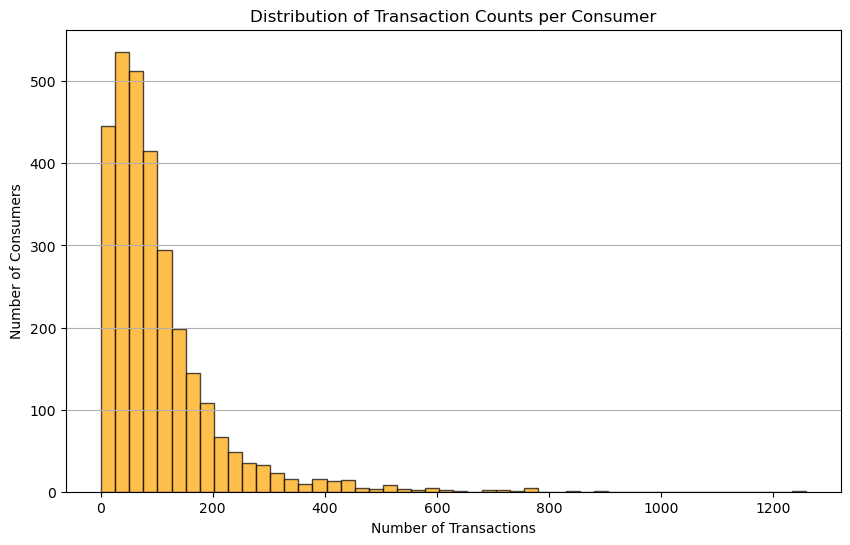

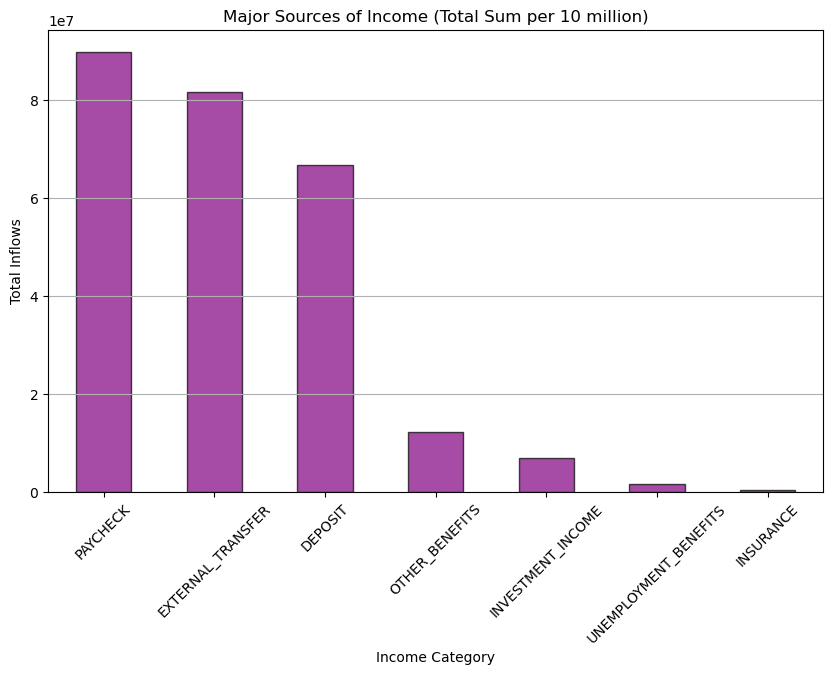

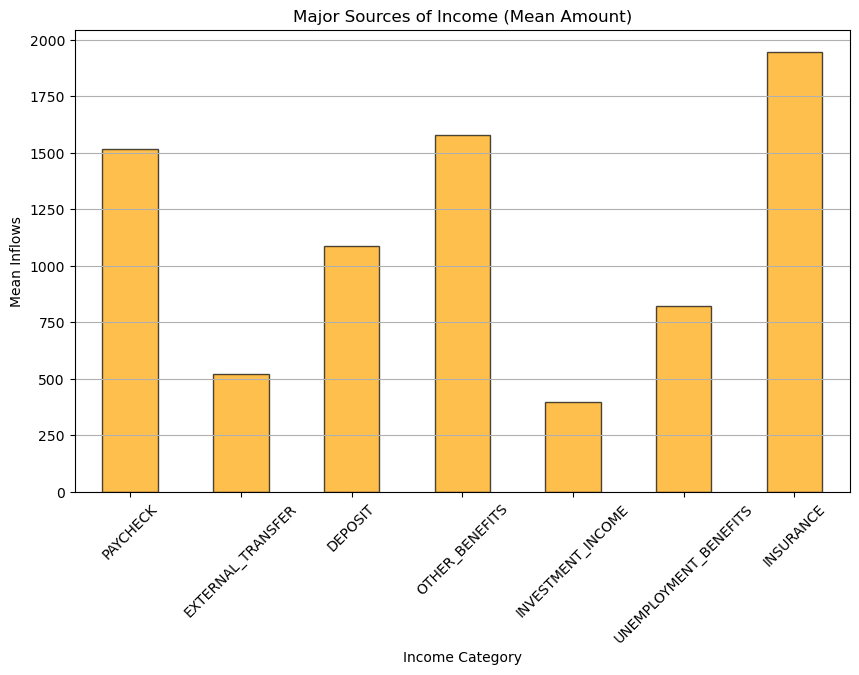

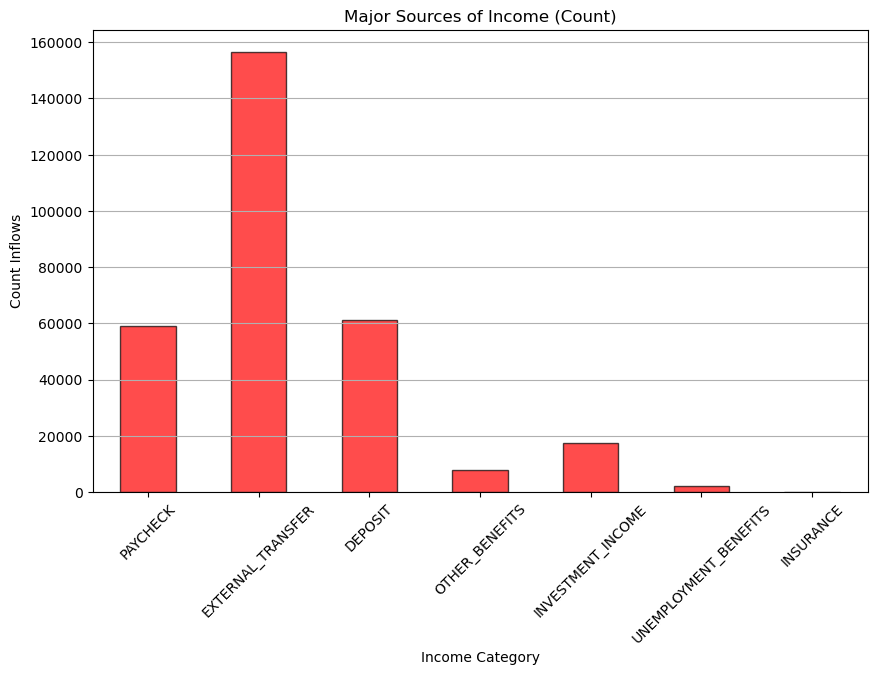

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'amount' with the actual name of the column containing transaction inflow values
# Replace 'w_cleaned_inflows' with the actual DataFrame name
cleaned_data = w_cleaned_inflows[w_cleaned_inflows['category'].isin(['PAYCHECK', 'EXTERNAL_TRANSFER', 'INVESTMENT_INCOME', 'DEPOSIT', 'PAYCHECK_PLACEHOLDER', 'INSURANCE', 'OTHER_BENEFITS', 'UNEMPLOYMENT_BENEFITS'])]
cleaned_data = cleaned_data.replace('PAYCHECK_PLACEHOLDER', 'PAYCHECK')
# Calculate statistics at the consumer level

consumer_stats = cleaned_data.groupby('prism_consumer_id').agg(
    transactions=('category', 'count'),       # Number of transactions per consumer
    total_inflows=('amount', 'sum')          # Total inflows per consumer
)

# Major sources of income (total sum and mean)
income_sources = cleaned_data.groupby('category').agg(
    total_inflows=('amount', 'sum'),         # Total inflows by income category
    mean_inflows=('amount', 'mean'),
    count_inflows=('amount', 'count')# Mean inflows by income category
).sort_values(by='total_inflows', ascending=False)


# Histogram of total inflows per consumer
plt.figure(figsize=(10, 6))
plt.hist(consumer_stats['total_inflows'], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Total Inflows per Consumer')
plt.xlabel('Total Inflows ($)')
plt.ylabel('Number of Consumers')  # Clarified the y-axis as frequency
plt.grid(axis='y')
plt.show()

# Count of transactions per consumer
plt.figure(figsize=(10, 6))
plt.hist(consumer_stats['transactions'], bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of Transaction Counts per Consumer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Consumers')
plt.grid(axis='y')
plt.show()


# Plot major sources of income (total sum)
plt.figure(figsize=(10, 6))
income_sources['total_inflows'].plot(kind='bar', alpha=0.7, color='purple', edgecolor='black')
plt.title('Major Sources of Income (Total Sum per 10 million)')
plt.xlabel('Income Category')
plt.ylabel('Total Inflows')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot major sources of income (mean inflow per category)
plt.figure(figsize=(10, 6))
income_sources['mean_inflows'].plot(kind='bar', alpha=0.7, color='orange', edgecolor='black')
plt.title('Major Sources of Income (Mean Amount)')
plt.xlabel('Income Category')
plt.ylabel('Mean Inflows')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot major sources of income (mean inflow per category)
plt.figure(figsize=(10, 6))
income_sources['count_inflows'].plot(kind='bar', alpha=0.7, color='red', edgecolor='black')
plt.title('Major Sources of Income (Count)')
plt.xlabel('Income Category')
plt.ylabel('Count Inflows')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [13]:
cleaned_data = cleaned_inflows[cleaned_inflows['category'].isin(['PAYCHECK', 'EXTERNAL_TRANSFER', 'INVESTMENT_INCOME', 'DEPOSIT', 'PAYCHECK_PLACEHOLDER', 'INSURANCE', 'OTHER_BENEFITS', 'UNEMPLOYMENT_BENEFITS'])]
cleaned_data = cleaned_data.replace('PAYCHECK_PLACEHOLDER', 'PAYCHECK')

In [14]:
import pandas as pd

# Step 1: Ensure 'posted_date' is datetime and sort the data
cleaned_data['posted_date'] = pd.to_datetime(cleaned_data['posted_date'])

# Reset index to ensure 'prism_consumer_id' and 'category' are columns
cleaned_data.reset_index(inplace=True, drop=True)

# Sort values by 'prism_consumer_id', 'category', and 'posted_date'
cleaned_data.sort_values(['prism_consumer_id', 'category', 'posted_date'], inplace=True)

# Step 2: Calculate time differences within each group
cleaned_data['time_diff'] = cleaned_data.groupby(['prism_consumer_id', 'category'])['posted_date'].diff().dt.days

# Step 3: Detect recurring patterns
def mark_recurring(group, monthly_tolerance=7, weekly_tolerance=3, biweekly_tolerance=3):
    # Initialize flags for recurring entries
    recurring_flags = [False] * len(group)
    for i in range(len(group) - 1):
        # Check for recurring patterns (monthly, weekly, or biweekly)
        time_diff = group['time_diff'].iloc[i + 1]
        if pd.notna(time_diff):
            # Check for monthly recurrence within tolerance
            if abs(time_diff - 30) <= monthly_tolerance:
                recurring_flags[i] = True
                recurring_flags[i + 1] = True
            # Check for weekly recurrence within tolerance
            elif abs(time_diff - 7) <= weekly_tolerance:
                recurring_flags[i] = True
                recurring_flags[i + 1] = True
            # Check for biweekly recurrence within tolerance
            elif abs(time_diff - 14) <= biweekly_tolerance:
                recurring_flags[i] = True
                recurring_flags[i + 1] = True
    group['is_recurring'] = recurring_flags
    return group

# Apply the mark_recurring function to each group
cleaned_data = cleaned_data.groupby(['prism_consumer_id', 'category']).apply(mark_recurring)

# Reset index again to avoid ambiguity after grouping
cleaned_data.reset_index(inplace=True, drop=True)

# Step 4: Expand recurring marking retroactively
def expand_recurring(group):
    if group['is_recurring'].any():
        group['is_recurring'] = True  # Mark all in the group as recurring if any are recurring
    return group

# Apply retroactive marking
cleaned_data = cleaned_data.groupby(['prism_consumer_id', 'category']).apply(expand_recurring)

# Reset index after grouping
cleaned_data.reset_index(inplace=True, drop=True)

# Step 5: Summarize recurring charges
recurring_summary = cleaned_data[cleaned_data['is_recurring']].groupby(['prism_consumer_id', 'category']).size().reset_index(name='recurrence_count')

print("Recurring Charges Summary:")
print(recurring_summary)


/tmp/ipykernel_680/497837963.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_data = cleaned_data.groupby(['prism_consumer_id', 'category']).apply(mark_recurring)


Recurring Charges Summary:
      prism_consumer_id           category  recurrence_count
0                     0            DEPOSIT                 3
1                     0  EXTERNAL_TRANSFER                42
2                     0  INVESTMENT_INCOME                12
3                     0           PAYCHECK                26
4                     2            DEPOSIT                11
...                 ...                ...               ...
8299               5939            DEPOSIT                74
8300               5940            DEPOSIT                81
8301               5940  EXTERNAL_TRANSFER               237
8302               5940  INVESTMENT_INCOME                17
8303               5940           PAYCHECK                36

[8304 rows x 3 columns]


/tmp/ipykernel_680/497837963.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_data = cleaned_data.groupby(['prism_consumer_id', 'category']).apply(expand_recurring)


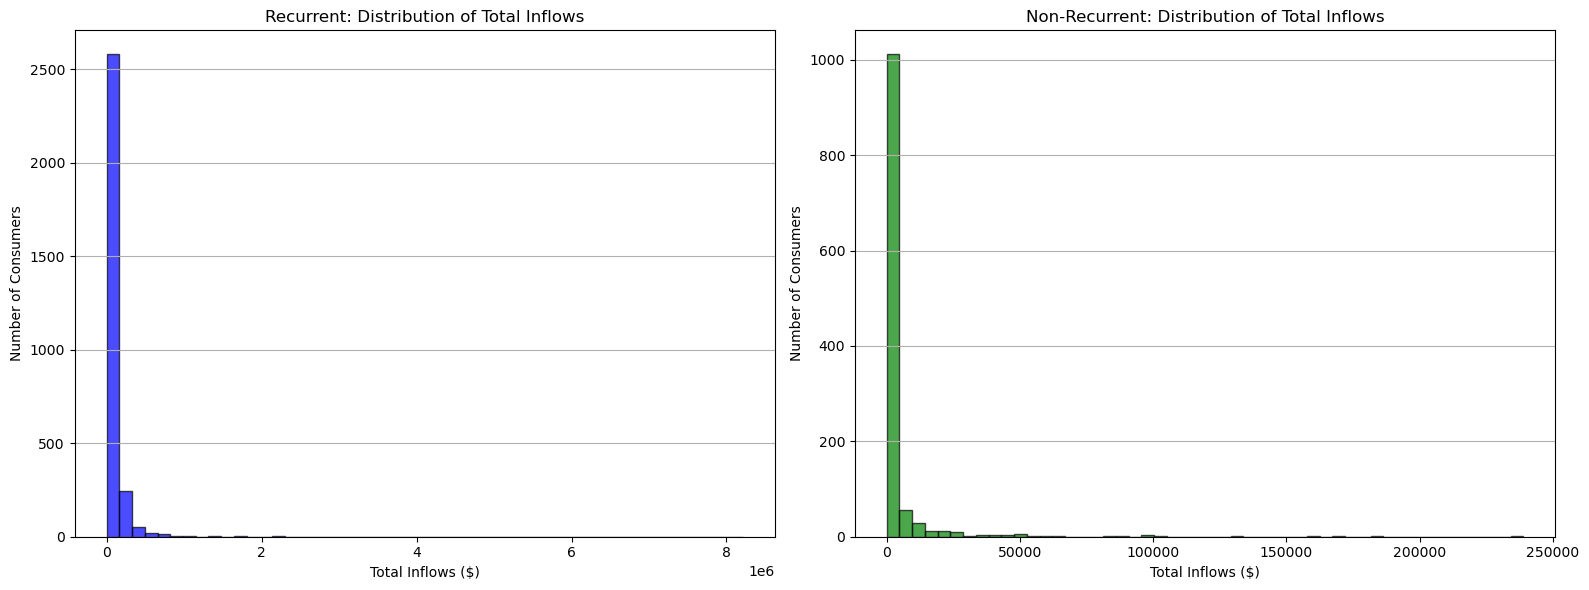

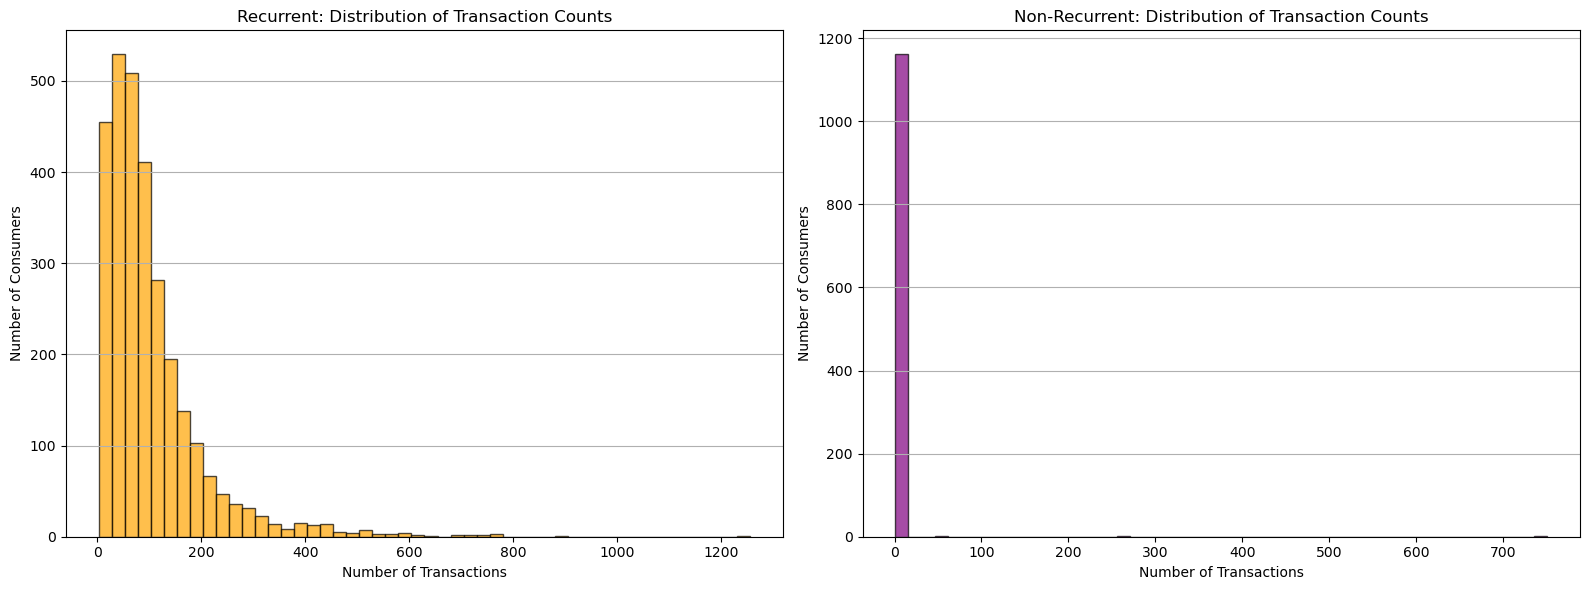

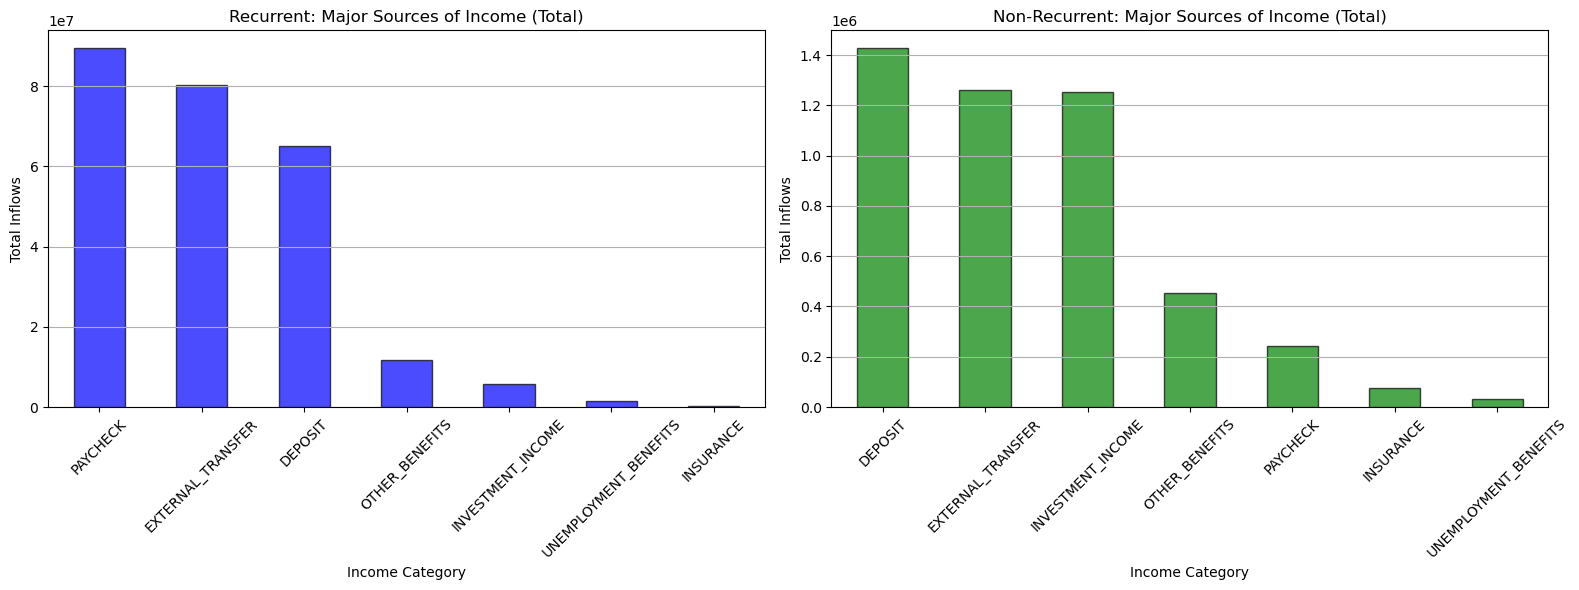

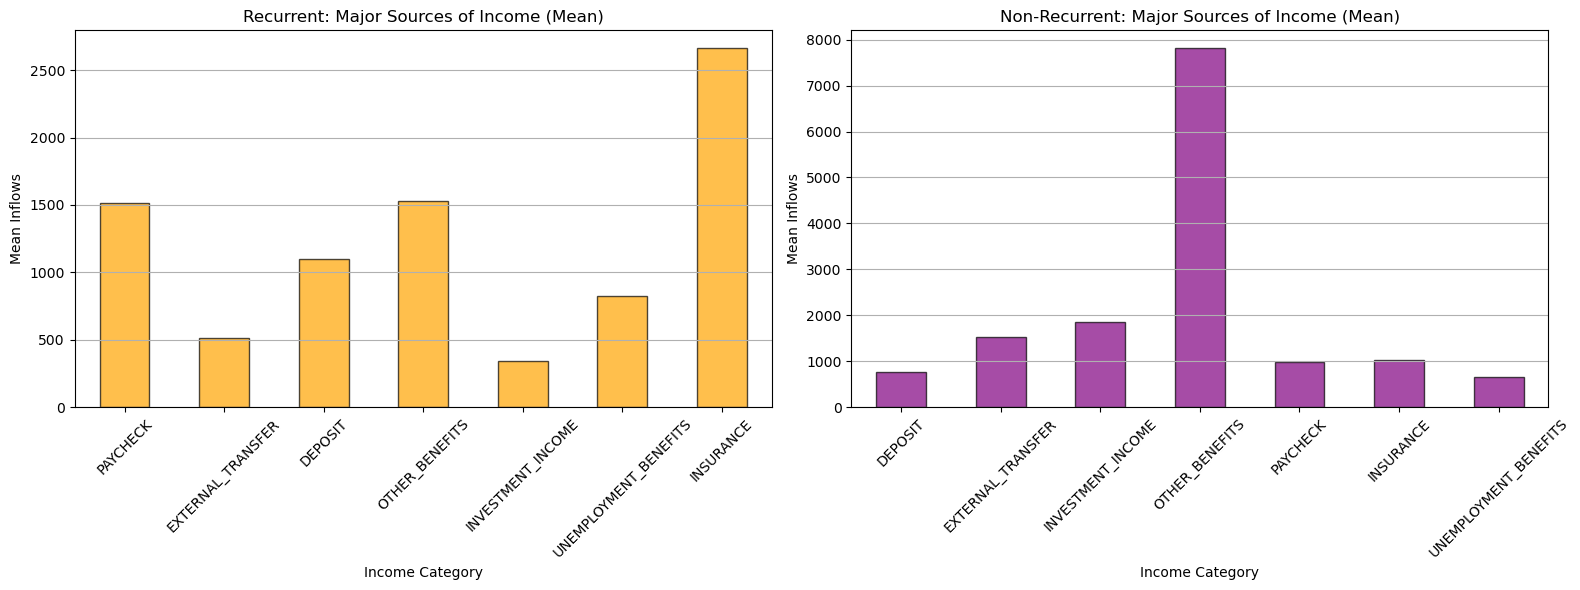

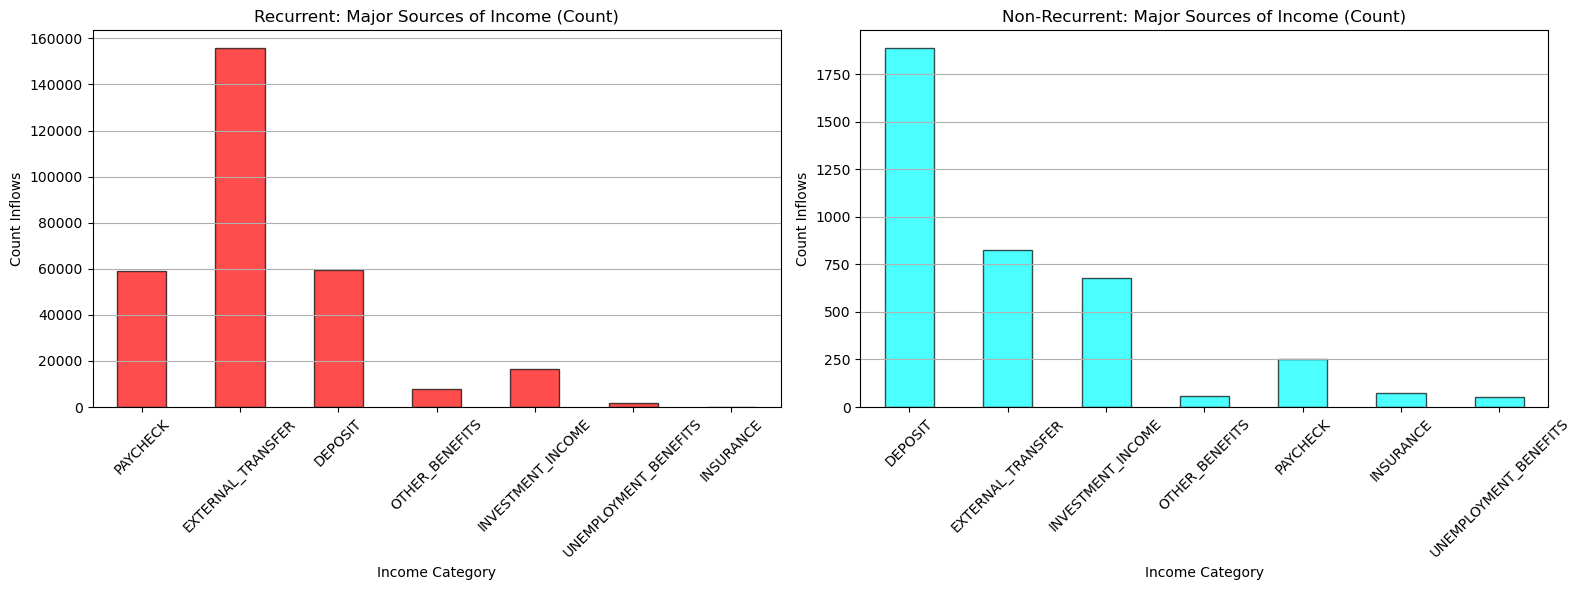

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the histograms for total inflows per consumer
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].hist(recurrent_stats['total_inflows'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Recurrent: Distribution of Total Inflows')
axes[0].set_xlabel('Total Inflows ($)')
axes[0].set_ylabel('Number of Consumers')
axes[0].grid(axis='y')

axes[1].hist(non_recurrent_stats['total_inflows'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Non-Recurrent: Distribution of Total Inflows')
axes[1].set_xlabel('Total Inflows ($)')
axes[1].set_ylabel('Number of Consumers')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

# Plot the histograms for transaction counts per consumer
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].hist(recurrent_stats['transactions'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0].set_title('Recurrent: Distribution of Transaction Counts')
axes[0].set_xlabel('Number of Transactions')
axes[0].set_ylabel('Number of Consumers')
axes[0].grid(axis='y')

axes[1].hist(non_recurrent_stats['transactions'], bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1].set_title('Non-Recurrent: Distribution of Transaction Counts')
axes[1].set_xlabel('Number of Transactions')
axes[1].set_ylabel('Number of Consumers')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

# Plot total inflows by income source
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
recurrent_income_sources['total_inflows'].plot(kind='bar', ax=axes[0], alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Recurrent: Major Sources of Income (Total)')
axes[0].set_xlabel('Income Category')
axes[0].set_ylabel('Total Inflows')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

non_recurrent_income_sources['total_inflows'].plot(kind='bar', ax=axes[1], alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Non-Recurrent: Major Sources of Income (Total)')
axes[1].set_xlabel('Income Category')
axes[1].set_ylabel('Total Inflows')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

# Plot mean inflows by income source
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
recurrent_income_sources['mean_inflows'].plot(kind='bar', ax=axes[0], alpha=0.7, color='orange', edgecolor='black')
axes[0].set_title('Recurrent: Major Sources of Income (Mean)')
axes[0].set_xlabel('Income Category')
axes[0].set_ylabel('Mean Inflows')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

non_recurrent_income_sources['mean_inflows'].plot(kind='bar', ax=axes[1], alpha=0.7, color='purple', edgecolor='black')
axes[1].set_title('Non-Recurrent: Major Sources of Income (Mean)')
axes[1].set_xlabel('Income Category')
axes[1].set_ylabel('Mean Inflows')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

# Plot count of inflows by income source
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
recurrent_income_sources['count_inflows'].plot(kind='bar', ax=axes[0], alpha=0.7, color='red', edgecolor='black')
axes[0].set_title('Recurrent: Major Sources of Income (Count)')
axes[0].set_xlabel('Income Category')
axes[0].set_ylabel('Count Inflows')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

non_recurrent_income_sources['count_inflows'].plot(kind='bar', ax=axes[1], alpha=0.7, color='cyan', edgecolor='black')
axes[1].set_title('Non-Recurrent: Major Sources of Income (Count)')
axes[1].set_xlabel('Income Category')
axes[1].set_ylabel('Count Inflows')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()
